# **Data and Information Quality project: Dependency analysis**

# Import google drive and libraries

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/DIQ/project

Mounted at /gdrive
/gdrive/My Drive/Colab Notebooks/DIQ/project


In [2]:
!git clone https://github.com/camillasancricca/DATADIQ.git

fatal: destination path 'DATADIQ' already exists and is not an empty directory.


In [13]:
import pandas as pd
import numpy as np
import random
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

from projects.A_data_collection import make_dataset_for_classification
from projects.D_data_analysis import classification
from projects.E_plot_results import plot

In [4]:
from DATADIQ import tane

In [5]:
import sys
sys.path.append('/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ')
import fdtool

# Generate dataset

In [6]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=2023)

In [7]:
X = pd.DataFrame(X)

In [8]:
# LIST OF ALGORITHMS FOR CLASSIFICATION
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost","MLP"]

In [9]:
SEED = 2023

# Main code

## Data pollution

In [10]:
# this function adds a new column, in the dataset, which is linearly dependend from one of the columns already present in the dataset
# and adds a random error to the new values
# Parameters:
# X: dataset to which the new column is added
# feature: column of the original dataset that will generate the new linearly dependent column
# coefficient: desired correlation coefficient (pearson) to be achieved
# error: random error
def pollute_dependency(X, feature, coefficient, error):
  if coefficient > 1: cefficient = 1
  if coefficient < -1: coefficient = -1

  polluted_df = X.copy()

  dependent_features = coefficient * polluted_df[feature] + np.sqrt(1 - coefficient**2) * np.random.RandomState(SEED).rand(1000) * error

  polluted_df[X.columns.stop] = dependent_features
  return polluted_df

In [11]:
# generate experiment datasets with varying parameters
datasets = []
datasets.append(pollute_dependency(X, 0, -1, 5.8))              # experiment 0
datasets.append(pollute_dependency(datasets[0], 1, .9, 5.8))    # experiment 1
datasets.append(pollute_dependency(datasets[1], 2, -.8, 5.8))   # experiment 2
datasets.append(pollute_dependency(datasets[2], 3, .7, 5))      # experiment 3
datasets.append(pollute_dependency(datasets[3], 4, .6, 6.9))    # experiment 4

datasets.append(pollute_dependency(X, 0, .95, 5.8))             # experiment 5
datasets.append(pollute_dependency(datasets[5], 1, .85, 5.8))   # experiment 6
datasets.append(pollute_dependency(datasets[6], 2, -.75, 5.8))  # experiment 7
datasets.append(pollute_dependency(datasets[7], 3, .65, 5))     # experiment 8
datasets.append(pollute_dependency(datasets[8], 4, -.55, 6.9))  # experiment 9

In [12]:
corr_coeff = datasets[9].corr('pearson')
corr_coeff

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.115730,-0.156550,-0.014878,0.275185,0.952080,0.100055,0.115062,-0.009515,-0.151007
1,0.115730,1.000000,0.219685,0.140620,-0.271040,0.103139,0.850240,-0.176311,0.075980,0.129808
2,-0.156550,0.219685,1.000000,0.379374,0.135801,-0.155116,0.178958,-0.746172,0.236924,-0.091473
3,-0.014878,0.140620,0.379374,1.000000,0.423421,-0.019474,0.112118,-0.289612,0.651175,-0.247589
4,0.275185,-0.271040,0.135801,0.423421,1.000000,0.265357,-0.227876,-0.092128,0.289740,-0.540886
5,0.952080,0.103139,-0.155116,-0.019474,0.265357,1.000000,0.250225,0.317655,0.219567,0.111646
6,0.100055,0.850240,0.178958,0.112118,-0.227876,0.250225,1.000000,0.206256,0.459107,0.551611
7,0.115062,-0.176311,-0.746172,-0.289612,-0.092128,0.317655,0.206256,1.000000,0.324108,0.623077
8,-0.009515,0.075980,0.236924,0.651175,0.289740,0.219567,0.459107,0.324108,1.000000,0.469337
9,-0.151007,0.129808,-0.091473,-0.247589,-0.540886,0.111646,0.551611,0.623077,0.469337,1.000000


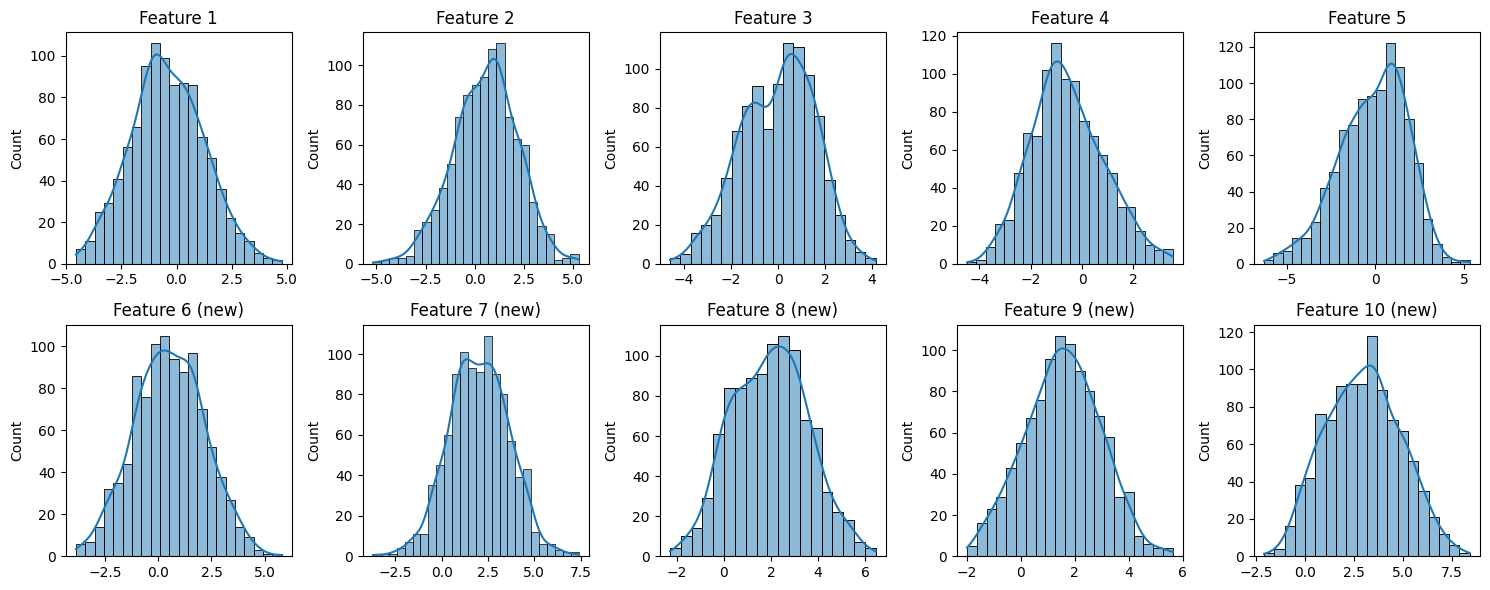

In [16]:
# Plot a time series for each category
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

axes = axes.flatten()

sns.histplot(datasets[9].to_numpy()[:, 0], kde=True, ax=axes[0])
axes[0].set_title('Feature 1')
sns.histplot(datasets[9].to_numpy()[:, 1], kde=True, ax=axes[1])
axes[1].set_title('Feature 2')
sns.histplot(datasets[9].to_numpy()[:, 2], kde=True, ax=axes[2])
axes[2].set_title('Feature 3')
sns.histplot(datasets[9].to_numpy()[:, 3], kde=True, ax=axes[3])
axes[3].set_title('Feature 4')
sns.histplot(datasets[9].to_numpy()[:, 4], kde=True, ax=axes[4])
axes[4].set_title('Feature 5')
sns.histplot(datasets[9].to_numpy()[:, 5], kde=True, ax=axes[5])
axes[5].set_title('Feature 6 (new)')
sns.histplot(datasets[9].to_numpy()[:, 6], kde=True, ax=axes[6])
axes[6].set_title('Feature 7 (new)')
sns.histplot(datasets[9].to_numpy()[:, 7], kde=True, ax=axes[7])
axes[7].set_title('Feature 8 (new)')
sns.histplot(datasets[9].to_numpy()[:, 8], kde=True, ax=axes[8])
axes[8].set_title('Feature 9 (new)')
sns.histplot(datasets[9].to_numpy()[:, 9], kde=True, ax=axes[9])
axes[9].set_title('Feature 10 (new)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

## Data analysis 1

Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for Ra

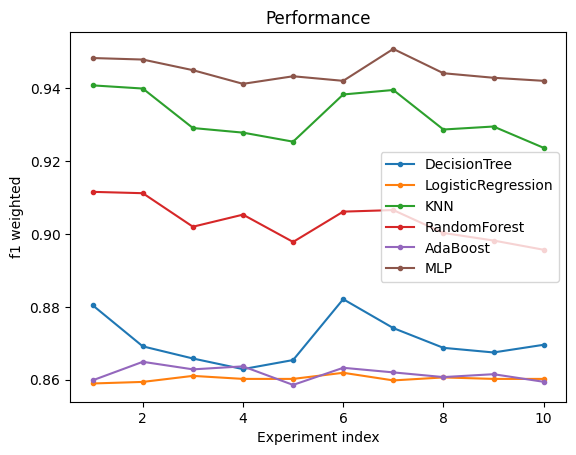

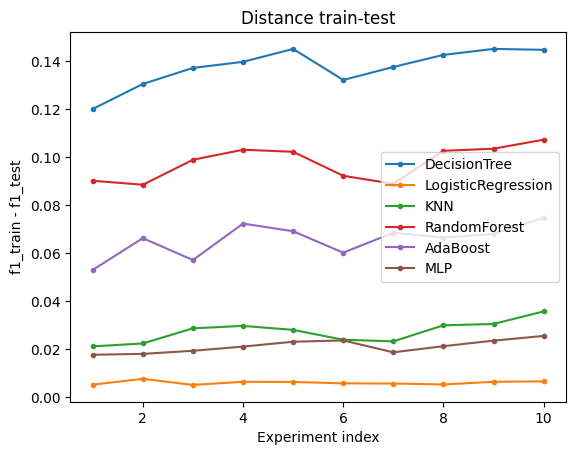

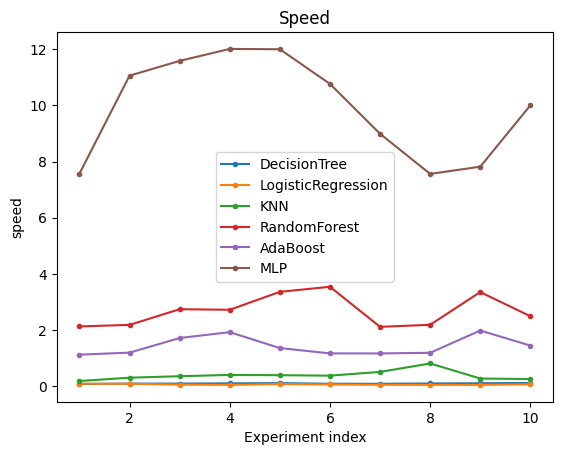

In [17]:
# CLASSIFICATION
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS:

    results_single_algorithm = []

    for i in range(0, 10):
        # DATA ANALYSIS
        results_analysis = classification(datasets[i], y, algorithm, SEED)
        results_single_algorithm.append(results_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="Experiment index", results=results_for_each_algorithm, title="Performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="Experiment index", results=results_for_each_algorithm, title="Distance train-test", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="Experiment index", results=results_for_each_algorithm, title="Speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

In [18]:
for i, element in enumerate(results_for_each_algorithm):
  algo = pd.DataFrame(element)
  print('Numerical results of ', CLASSIFICATION_ALGORITHMS[i], ':')
  print(algo)
  print('-------------------------------------')

Numerical results of  DecisionTree :
   mean_perf  distance     speed
0   0.880421  0.120011  0.079844
1   0.869141  0.130453  0.091152
2   0.865809  0.137143  0.093405
3   0.862891  0.139679  0.100645
4   0.865383  0.145052  0.108706
5   0.882100  0.132117  0.087503
6   0.874159  0.137537  0.085735
7   0.868736  0.142579  0.096870
8   0.867467  0.145062  0.104380
9   0.869572  0.144688  0.111652
-------------------------------------
Numerical results of  LogisticRegression :
   mean_perf  distance     speed
0   0.858947  0.005091  0.088554
1   0.859377  0.007525  0.086325
2   0.861034  0.004987  0.055562
3   0.860203  0.006294  0.045414
4   0.860203  0.006229  0.075895
5   0.861885  0.005640  0.061250
6   0.859790  0.005567  0.048664
7   0.860610  0.005167  0.046957
8   0.860203  0.006294  0.046454
9   0.860203  0.006473  0.067534
-------------------------------------
Numerical results of  KNN :
   mean_perf  distance     speed
0   0.940816  0.021056  0.184291
1   0.939949  0.022271  

In [19]:
decision_tree = pd.DataFrame(results_for_each_algorithm[0])
decision_tree

,mean_perf,distance,speed
0,0.880421,0.120011,0.079844
1,0.869141,0.130453,0.091152
2,0.865809,0.137143,0.093405
3,0.862891,0.139679,0.100645
4,0.865383,0.145052,0.108706
5,0.882100,0.132117,0.087503
6,0.874159,0.137537,0.085735
7,0.868736,0.142579,0.096870
8,0.867467,0.145062,0.104380
9,0.869572,0.144688,0.111652


In [20]:
logistic_regression = pd.DataFrame(results_for_each_algorithm[1])
logistic_regression

,mean_perf,distance,speed
0,0.858947,0.005091,0.088554
1,0.859377,0.007525,0.086325
2,0.861034,0.004987,0.055562
3,0.860203,0.006294,0.045414
4,0.860203,0.006229,0.075895
5,0.861885,0.005640,0.061250
6,0.859790,0.005567,0.048664
7,0.860610,0.005167,0.046957
8,0.860203,0.006294,0.046454
9,0.860203,0.006473,0.067534


In [21]:
knn = pd.DataFrame(results_for_each_algorithm[2])
knn

,mean_perf,distance,speed
0,0.940816,0.021056,0.184291
1,0.939949,0.022271,0.302717
2,0.929104,0.028581,0.355691
3,0.927839,0.029590,0.401474
4,0.925356,0.027937,0.391652
5,0.938320,0.023819,0.375792
6,0.939551,0.023149,0.508905
7,0.928695,0.029834,0.809247
8,0.929518,0.030391,0.273841
9,0.923670,0.035637,0.252492


In [22]:
random_forest = pd.DataFrame(results_for_each_algorithm[3])
random_forest

,mean_perf,distance,speed
0,0.911575,0.090102,2.129661
1,0.911205,0.088443,2.183670
2,0.901997,0.098851,2.742495
3,0.905318,0.103032,2.722853
4,0.897815,0.102177,3.360865
5,0.906143,0.092167,3.541817
6,0.906568,0.088839,2.114179
7,0.900291,0.102598,2.187162
8,0.898208,0.103453,3.353604
9,0.895673,0.107231,2.492735


In [23]:
adaboost = pd.DataFrame(results_for_each_algorithm[4])
adaboost

,mean_perf,distance,speed
0,0.859821,0.052940,1.123760
1,0.864900,0.066178,1.195967
2,0.862824,0.057044,1.715411
3,0.863648,0.072245,1.925677
4,0.858551,0.069053,1.358711
5,0.863255,0.060125,1.168259
6,0.861992,0.068420,1.167645
7,0.860705,0.066433,1.190310
8,0.861496,0.067930,1.982609
9,0.859412,0.074701,1.446816


In [24]:
mlp = pd.DataFrame(results_for_each_algorithm[5])
mlp

,mean_perf,distance,speed
0,0.948327,0.017568,7.571486
1,0.947909,0.017926,11.061278
2,0.944993,0.019226,11.588149
3,0.941239,0.020963,12.014236
4,0.943320,0.022990,12.002493
5,0.942062,0.023527,10.768515
6,0.950828,0.018580,8.991278
7,0.944151,0.021133,7.562461
8,0.942907,0.023453,7.819172
9,0.942064,0.025411,10.004093


## Functional Dependency detection

In [ ]:
# transform datasets into csv
for i in range(10):
  datasets[i].to_csv('Dependency datasets/dataset_'+str(i)+'.csv', index=False)

In [ ]:
# run tane
for i in range(10):
  print('---------------------------------')
  print('Dataset: ' + str(i))
  tane.compute('Dependency datasets/dataset_'+str(i)+'.csv')

---------------------------------
Dataset: 0
List of all FDs:  [['0', '3'], ['0', '4'], ['0', '5'], ['0', '2'], ['0', '1'], ['1', '3'], ['1', '4'], ['1', '0'], ['1', '5'], ['1', '2'], ['2', '3'], ['2', '4'], ['2', '0'], ['2', '5'], ['2', '1'], ['3', '4'], ['3', '0'], ['3', '5'], ['3', '2'], ['3', '1'], ['4', '3'], ['4', '0'], ['4', '5'], ['4', '2'], ['4', '1'], ['5', '3'], ['5', '4'], ['5', '0'], ['5', '2'], ['5', '1']]
Total number of FDs found:  30
---------------------------------
Dataset: 1
List of all FDs:  [['0', '3'], ['0', '4'], ['0', '5'], ['0', '2'], ['0', '1'], ['0', '6'], ['1', '3'], ['1', '4'], ['1', '0'], ['1', '5'], ['1', '2'], ['1', '6'], ['2', '3'], ['2', '4'], ['2', '0'], ['2', '5'], ['2', '1'], ['2', '6'], ['3', '4'], ['3', '0'], ['3', '5'], ['3', '2'], ['3', '1'], ['3', '6'], ['4', '3'], ['4', '0'], ['4', '5'], ['4', '2'], ['4', '1'], ['4', '6'], ['5', '3'], ['5', '4'], ['5', '0'], ['5', '2'], ['5', '1'], ['5', '6'], ['6', '3'], ['6', '4'], ['6', '0'], ['6', '5'], [

In [ ]:
# run fdtool
for i in range(10):
  print('---------------------------------')
  print('Dataset: ' + str(i))
  fdtool.main('Dependency datasets/dataset_'+str(i)+'.csv')

---------------------------------
Dataset: 0

Reading file: 
Dependency datasets/dataset_0.csv

Functional Dependencies: 
{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {2}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -> {5}
{1} -> {2}
{2} -> {3}
{2} -> {4}
{2} -> {0}
{2} -> {5}
{2} -> {1}
{3} -> {4}
{3} -> {0}
{3} -> {5}
{3} -> {1}
{3} -> {2}
{4} -> {3}
{4} -> {0}
{4} -> {5}
{4} -> {1}
{4} -> {2}
{5} -> {3}
{5} -> {4}
{5} -> {0}
{5} -> {1}
{5} -> {2}

Equivalences: 
{0} <-> {1}
{0} <-> {2}
{0} <-> {3}
{0} <-> {4}
{0} <-> {5}
{1} <-> {2}
{1} <-> {3}
{1} <-> {4}
{1} <-> {5}
{2} <-> {3}
{2} <-> {4}
{2} <-> {5}
{3} <-> {4}
{3} <-> {5}
{4} <-> {5}

Time (s): 0.1931
Row count: 1000
Attribute count: 6
Number of Equivalences: 15
Number of FDs: 30
Number of FDs checked: 42
---------------------------------
Dataset: 1

Reading file: 
Dependency datasets/dataset_1.csv

Functional Dependencies: 


/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {6}
{0} -> {2}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -> {5}
{1} -> {6}
{1} -> {2}
{2} -> {3}
{2} -> {4}
{2} -> {0}
{2} -> {5}
{2} -> {1}
{2} -> {6}
{3} -> {4}
{3} -> {0}
{3} -> {5}
{3} -> {1}
{3} -> {6}
{3} -> {2}
{4} -> {3}


/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{4} -> {0}
{4} -> {5}
{4} -> {1}
{4} -> {6}
{4} -> {2}
{5} -> {3}
{5} -> {4}
{5} -> {0}
{5} -> {1}
{5} -> {6}
{5} -> {2}
{6} -> {3}
{6} -> {4}
{6} -> {0}
{6} -> {5}
{6} -> {1}
{6} -> {2}

Equivalences: 
{0} <-> {1}
{0} <-> {2}
{0} <-> {3}
{0} <-> {4}
{0} <-> {5}
{0} <-> {6}
{1} <-> {2}
{1} <-> {3}
{1} <-> {4}
{1} <-> {5}
{1} <-> {6}
{2} <-> {3}
{2} <-> {4}
{2} <-> {5}
{2} <-> {6}
{3} <-> {4}
{3} <-> {5}
{3} <-> {6}
{4} <-> {5}
{4} <-> {6}
{5} <-> {6}

Time (s): 0.5495
Row count: 1000
Attribute count: 7
Number of Equivalences: 21
Number of FDs: 42
Number of FDs checked: 70
---------------------------------
Dataset: 2

Reading file: 
Dependency datasets/dataset_2.csv

Functional Dependencies: 
{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {6}
{0} -> {7}
{0} -> {2}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -> {5}
{1} -> {6}
{1} -> {7}
{1} -> {2}
{2} -> {3}
{2} -> {4}
{2} -> {0}
{2} -> {5}
{2} -> {1}
{2} -> {6}
{2} -> {7}
{3} -> {4}
{3} -> {0}
{3} -> {5}
{3} -> {1}
{3} -> {6}
{3} -> {7}
{3

/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {6}
{0} -> {7}
{0} -> {8}
{0} -> {2}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -> {5}
{1} -> {6}
{1} -> {7}
{1} -> {8}
{1} -> {2}
{2} -> {3}
{2} -> {4}
{2} -> {0}
{2} -> {5}
{2} -> {1}
{2} -> {6}
{2} -> {7}
{2} -> {8}
{3} -> {4}
{3} -> {0}
{3} -> {5}
{3} -> {1}
{3} -> {6}
{3} -> {7}
{3} -> {8}
{3} -> {2}
{4} -> {3}
{4} -> {0}
{4} -> {5}
{4} -> {1}
{4} -> {6}
{4} -> {7}
{4} -> {8}
{4} -> {2}
{5} -> {3}
{5} -> {4}
{5} -> {0}
{5} -> {1}
{5} -> {6}
{5} -> {7}
{5} -> {8}


/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{5} -> {2}
{6} -> {3}
{6} -> {4}
{6} -> {0}
{6} -> {5}
{6} -> {1}
{6} -> {7}
{6} -> {8}
{6} -> {2}
{7} -> {3}
{7} -> {4}
{7} -> {0}
{7} -> {5}
{7} -> {1}
{7} -> {6}
{7} -> {8}
{7} -> {2}
{8} -> {3}
{8} -> {4}
{8} -> {0}
{8} -> {5}
{8} -> {1}
{8} -> {6}
{8} -> {7}
{8} -> {2}

Equivalences: 
{0} <-> {1}
{0} <-> {2}
{0} <-> {3}
{0} <-> {4}
{0} <-> {5}
{0} <-> {6}
{0} <-> {7}
{0} <-> {8}
{1} <-> {2}
{1} <-> {3}
{1} <-> {4}
{1} <-> {5}
{1} <-> {6}
{1} <-> {7}
{1} <-> {8}
{2} <-> {3}
{2} <-> {4}
{2} <-> {5}
{2} <-> {6}
{2} <-> {7}
{2} <-> {8}
{3} <-> {4}
{3} <-> {5}
{3} <-> {6}
{3} <-> {7}
{3} <-> {8}
{4} <-> {5}
{4} <-> {6}
{4} <-> {7}
{4} <-> {8}
{5} <-> {6}
{5} <-> {7}
{5} <-> {8}
{6} <-> {7}
{6} <-> {8}
{7} <-> {8}

Time (s): 0.5943
Row count: 1000
Attribute count: 9
Number of Equivalences: 36
Number of FDs: 72
Number of FDs checked: 151
---------------------------------
Dataset: 4

Reading file: 
Dependency datasets/dataset_4.csv

Functional Dependencies: 
{0} -> {3}
{0} -> {4}
{0} -> {

/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{8} -> {3}
{8} -> {4}
{8} -> {0}
{8} -> {5}
{8} -> {1}
{8} -> {6}
{8} -> {7}
{8} -> {2}
{8} -> {9}
{9} -> {3}
{9} -> {4}
{9} -> {0}
{9} -> {5}
{9} -> {1}
{9} -> {6}
{9} -> {7}
{9} -> {8}
{9} -> {2}

Equivalences: 
{0} <-> {1}
{0} <-> {2}
{0} <-> {3}
{0} <-> {4}
{0} <-> {5}
{0} <-> {6}
{0} <-> {7}
{0} <-> {8}
{0} <-> {9}
{1} <-> {2}
{1} <-> {3}
{1} <-> {4}
{1} <-> {5}
{1} <-> {6}
{1} <-> {7}
{1} <-> {8}
{1} <-> {9}
{2} <-> {3}
{2} <-> {4}
{2} <-> {5}
{2} <-> {6}
{2} <-> {7}
{2} <-> {8}
{2} <-> {9}
{3} <-> {4}
{3} <-> {5}
{3} <-> {6}
{3} <-> {7}
{3} <-> {8}
{3} <-> {9}
{4} <-> {5}
{4} <-> {6}
{4} <-> {7}
{4} <-> {8}
{4} <-> {9}
{5} <-> {6}
{5} <-> {7}
{5} <-> {8}
{5} <-> {9}
{6} <-> {7}
{6} <-> {8}
{6} <-> {9}
{7} <-> {8}
{7} <-> {9}
{8} <-> {9}

Time (s): 0.5154
Row count: 1000
Attribute count: 10
Number of Equivalences: 45
Number of FDs: 90
Number of FDs checked: 206
---------------------------------
Dataset: 5

Reading file: 
Dependency datasets/dataset_5.csv

Functional Dependencies:

/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {6}
{0} -> {2}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -> {5}
{1} -> {6}
{1} -> {2}
{2} -> {3}
{2} -> {4}
{2} -> {0}
{2} -> {5}
{2} -> {1}
{2} -> {6}
{3} -> {4}
{3} -> {0}
{3} -> {5}
{3} -> {1}
{3} -> {6}
{3} -> {2}
{4} -> {3}
{4} -> {0}
{4} -> {5}
{4} -> {1}
{4} -> {6}
{4} -> {2}
{5} -> {3}
{5} -> {4}
{5} -> {0}
{5} -> {1}
{5} -> {6}
{5} -> {2}
{6} -> {3}
{6} -> {4}
{6} -> {0}
{6} -> {5}
{6} -> {1}
{6} -> {2}

Equivalences: 
{0} <-> {1}
{0} <-> {2}
{0} <-> {3}
{0} <-> {4}
{0} <-> {5}
{0} <-> {6}
{1} <-> {2}
{1} <-> {3}
{1} <-> {4}
{1} <-> {5}
{1} <-> {6}
{2} <-> {3}
{2} <-> {4}
{2} <-> {5}
{2} <-> {6}
{3} <-> {4}
{3} <-> {5}
{3} <-> {6}
{4} <-> {5}
{4} <-> {6}
{5} <-> {6}

Time (s): 0.3421
Row count: 1000
Attribute count: 7
Number of Equivalences: 21
Number of FDs: 42
Number of FDs checked: 255


/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

---------------------------------
Dataset: 7

Reading file: 
Dependency datasets/dataset_7.csv

Functional Dependencies: 
{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {6}
{0} -> {7}
{0} -> {2}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -> {5}
{1} -> {6}
{1} -> {7}
{1} -> {2}
{2} -> {3}
{2} -> {4}
{2} -> {0}
{2} -> {5}
{2} -> {1}
{2} -> {6}
{2} -> {7}
{3} -> {4}
{3} -> {0}
{3} -> {5}
{3} -> {1}
{3} -> {6}
{3} -> {7}
{3} -> {2}
{4} -> {3}
{4} -> {0}
{4} -> {5}


/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{4} -> {1}
{4} -> {6}
{4} -> {7}
{4} -> {2}
{5} -> {3}
{5} -> {4}
{5} -> {0}
{5} -> {1}
{5} -> {6}
{5} -> {7}
{5} -> {2}
{6} -> {3}
{6} -> {4}
{6} -> {0}
{6} -> {5}
{6} -> {1}
{6} -> {7}
{6} -> {2}
{7} -> {3}
{7} -> {4}
{7} -> {0}
{7} -> {5}
{7} -> {1}
{7} -> {6}
{7} -> {2}

Equivalences: 
{0} <-> {1}
{0} <-> {2}
{0} <-> {3}
{0} <-> {4}
{0} <-> {5}
{0} <-> {6}
{0} <-> {7}
{1} <-> {2}
{1} <-> {3}
{1} <-> {4}
{1} <-> {5}
{1} <-> {6}
{1} <-> {7}
{2} <-> {3}
{2} <-> {4}
{2} <-> {5}
{2} <-> {6}
{2} <-> {7}
{3} <-> {4}
{3} <-> {5}
{3} <-> {6}
{3} <-> {7}
{4} <-> {5}
{4} <-> {6}
{4} <-> {7}
{5} <-> {6}
{5} <-> {7}
{6} <-> {7}

Time (s): 0.4461
Row count: 1000
Attribute count: 8
Number of Equivalences: 28
Number of FDs: 56
Number of FDs checked: 291
---------------------------------
Dataset: 8

Reading file: 
Dependency datasets/dataset_8.csv

Functional Dependencies: 
{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {6}
{0} -> {7}
{0} -> {8}
{0} -> {2}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -

/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{7} -> {1}
{7} -> {6}
{7} -> {8}
{7} -> {2}
{8} -> {3}
{8} -> {4}
{8} -> {0}
{8} -> {5}
{8} -> {1}
{8} -> {6}
{8} -> {7}
{8} -> {2}

Equivalences: 
{0} <-> {1}
{0} <-> {2}
{0} <-> {3}
{0} <-> {4}
{0} <-> {5}
{0} <-> {6}
{0} <-> {7}
{0} <-> {8}
{1} <-> {2}
{1} <-> {3}
{1} <-> {4}
{1} <-> {5}
{1} <-> {6}
{1} <-> {7}
{1} <-> {8}
{2} <-> {3}
{2} <-> {4}
{2} <-> {5}
{2} <-> {6}
{2} <-> {7}
{2} <-> {8}
{3} <-> {4}
{3} <-> {5}
{3} <-> {6}
{3} <-> {7}
{3} <-> {8}
{4} <-> {5}
{4} <-> {6}
{4} <-> {7}
{4} <-> {8}
{5} <-> {6}
{5} <-> {7}
{5} <-> {8}
{6} <-> {7}
{6} <-> {8}
{7} <-> {8}

Time (s): 0.4558
Row count: 1000
Attribute count: 9
Number of Equivalences: 36
Number of FDs: 72
Number of FDs checked: 336
---------------------------------
Dataset: 9

Reading file: 
Dependency datasets/dataset_9.csv

Functional Dependencies: 


/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P

{0} -> {3}
{0} -> {4}
{0} -> {5}
{0} -> {1}
{0} -> {6}
{0} -> {7}
{0} -> {8}
{0} -> {2}
{0} -> {9}
{1} -> {3}
{1} -> {4}
{1} -> {0}
{1} -> {5}
{1} -> {6}
{1} -> {7}
{1} -> {8}
{1} -> {2}
{1} -> {9}
{2} -> {3}
{2} -> {4}
{2} -> {0}
{2} -> {5}
{2} -> {1}
{2} -> {6}
{2} -> {7}
{2} -> {8}
{2} -> {9}
{3} -> {4}
{3} -> {0}
{3} -> {5}
{3} -> {1}
{3} -> {6}
{3} -> {7}
{3} -> {8}
{3} -> {2}
{3} -> {9}
{4} -> {3}
{4} -> {0}
{4} -> {5}
{4} -> {1}
{4} -> {6}
{4} -> {7}
{4} -> {8}
{4} -> {2}
{4} -> {9}
{5} -> {3}
{5} -> {4}
{5} -> {0}
{5} -> {1}
{5} -> {6}
{5} -> {7}
{5} -> {8}
{5} -> {2}
{5} -> {9}
{6} -> {3}
{6} -> {4}
{6} -> {0}
{6} -> {5}
{6} -> {1}
{6} -> {7}
{6} -> {8}
{6} -> {2}
{6} -> {9}
{7} -> {3}
{7} -> {4}
{7} -> {0}
{7} -> {5}
{7} -> {1}
{7} -> {6}
{7} -> {8}
{7} -> {2}
{7} -> {9}
{8} -> {3}
{8} -> {4}
{8} -> {0}
{8} -> {5}
{8} -> {1}
{8} -> {6}
{8} -> {7}
{8} -> {2}
{8} -> {9}
{9} -> {3}
{9} -> {4}
{9} -> {0}
{9} -> {5}
{9} -> {1}
{9} -> {6}
{9} -> {7}
{9} -> {8}
{9} -> {2}

Equivalen

/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/Prune.py:54: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(X, 1)
/gdrive/MyDrive/Colab Notebooks/DIQ/project/DATADIQ/fdtool_modules/P


Time (s): 0.7856
Row count: 1000
Attribute count: 10
Number of Equivalences: 45
Number of FDs: 90
Number of FDs checked: 391
